In [1]:
%run stdPackages.ipynb

# PS1: Marginal Abatement Costs

## 1. Toy Model

In the first exercise,  we consider the model from the note *A Simple Model of Abatement Costs* in section 1. We will use specific assumptions on production and climate damages as follows:
* Production is isoelastic with $F(E) = \gamma E^{\alpha}$ where $\gamma>0$ and $\alpha\in(0,1)$ are constants. We will use $\alpha = 0.5$ and $\gamma =1$ in the following.
* The cost of extracting fossil energy is normalized at $p_e = 1$.
* Climate damages are quadratic with $D(M) = \gamma_D M^2 /2$, where we will use $\gamma_D = 100$ in the following.
* The emission intensity of fossil energy is set to $\phi = 0.25$.

Abent regulation or climate damages, consumption maximizes $C^0 = \max \left(F(E)-p_eE\right)$ such that
$$\begin{align}
    C^0 = \left(\dfrac{\gamma \alpha}{p_e}\right)^{\frac{1}{1-\alpha}}
\end{align}$$

As mentioned in the lecture note, the optimal level of fossil energy $(E^*$) that internalizes the effect on climate damages can be identified by solving the equation $F'(E) -p_e = \phi D'(M)$. With the functional forms assumed here, this means that $E^*$ solves the equation:

$$\begin{align}
    \alpha\gamma E^{\alpha-1}-p_e = \gamma_D \phi^2 E.
\end{align}$$

Given the solution for $E^*$, the optimal level of consumption is then simply found by evaluating $C = F(e)-p_eE-D(M)$:
$$\begin{align}
    C^* = \gamma (E^*)^{\alpha}-p_e E^* - \gamma_D(\phi E^*)^2 /2
\end{align}$$


In the following exercises, we'll ask you to:
1. Plot a figure of consumption *without damages* and emissions as a function $E$ (like figure 1.1 in the lecture note). 
2. Show an illustration of the marginal abatement costs (like figure 1.2 in the lecture note).
3. Solve for the optimal level of $E^*, M^*, C^*$. 
4. Plot the marginal abatement costs and marginal damages (like figure 1.3 in the lecture note).

### *Preliminaries*

*Define parameters:*

In [2]:
α  = .5
γ  = 1
pe = 1
ϕ  = .25
γd = 100

*Define the consumption function *absent* climate damages and $C^0$:*

In [3]:
def Cfunction(E, α, γ, pe):
    return γ * np.power(E, α) - pe * E
def E0function(α, γ, pe):
    return (γ*α/pe)**(1/(1-α))
def C0function(α, γ, pe):
    return Cfunction(E0function(α, γ, pe), α, γ, pe)
def Mfunction(E, ϕ):
    return ϕ*E

### 1.1. Plot consumption and emissions as a function of $E$

*Given a vector of $E$, plot consumption and emissions:*

In [4]:
Egrid = np.linspace(0, 1, 1001)
dfGrid = pd.DataFrame({'$C$': Cfunction(Egrid, α, γ, pe),
                       '$M$': Mfunction(Egrid, ϕ)},
                      index = pd.Index(Egrid, name = '$E$')) # dataframe with C and M as data
E0 = E0function(α, γ, pe) 
C0 = C0function(α, γ, pe)
M0 = Mfunction(E0, ϕ)

*Simple plot:*

In [5]:
# dfGrid.plot()

*Fancy plot:*

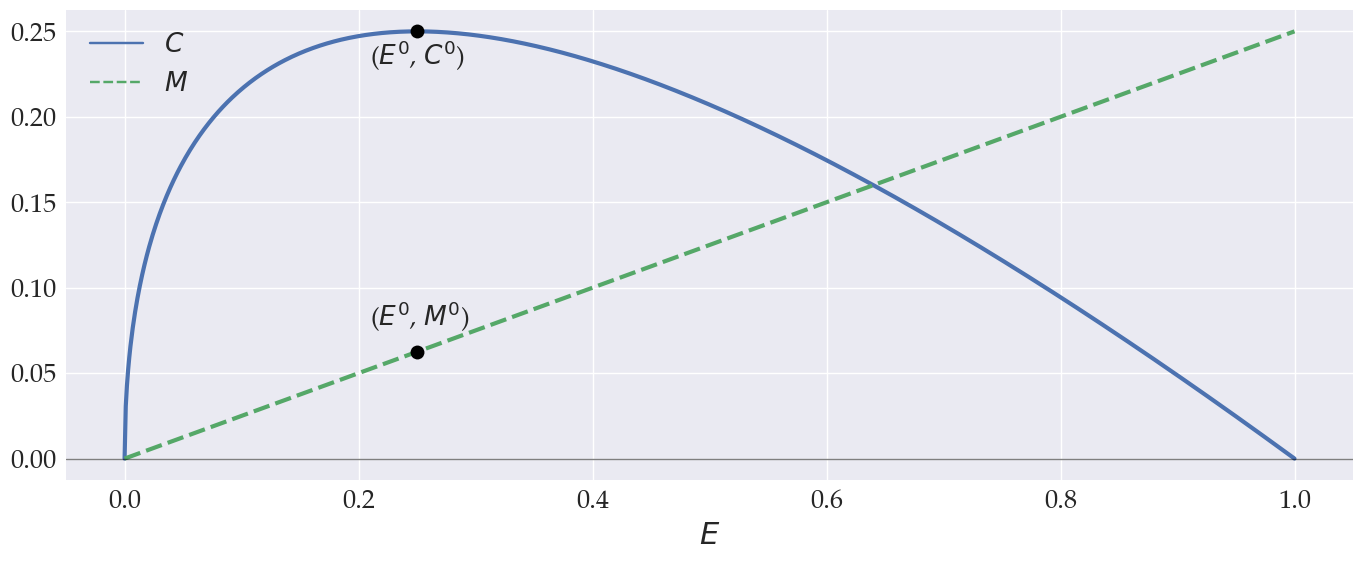

In [6]:
one_graph()
fig, ax = plt.subplots(1,1,figsize = (14,6)); # size of plot
seaborn.lineplot(data = dfGrid, ax = ax, linewidth=3); # main plot
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5); # axis
# Add optimum to plot with annotation:
plt.annotate(f'($E^0$, $C^0$)', xy = (E0-.04, C0-0.02)); # add text below optimum
# Add optimum to plot with annotation:
plt.annotate(f'($E^0$, $M^0$)', xy = (E0-.04, M0+0.015)); # add text below optimum
ax.plot([E0, E0], [M0, C0], 'o', markersize = 10, color = 'k') # add marker to the optimum
fig.tight_layout(); # automatic adjustment of layout
fig.savefig(os.path.join(d['figs'], "MAC_1_Baseline.pdf"),edgecolor='k') # save as pdf

### 1.2. Plot marginal abatement costs

*Now, define marginal abatement costs on a grid of abated emissions:*

In [7]:
def Afunction(E, ϕ, M0): # get A from E and M0
    return M0-Mfunction(E, ϕ)
def MACfunction(E, α, γ, pe, ϕ, M0):
    return pd.Series((γ*α*np.power(E, α-1)-pe)/ϕ, 
                     index = pd.Index(Afunction(E, ϕ, M0), name = '$A$'),
                     name = '$MAC$'
                    )

Plot:

In [8]:
MAC = MACfunction(Egrid, α, γ, pe, ϕ, M0) 
# MAC.plot() # simple plot

C:\Users\sxj477\AppData\Local\Temp\ipykernel_14728\350050679.py:4: RuntimeWarning: divide by zero encountered in power
  return pd.Series((γ*α*np.power(E, α-1)-pe)/ϕ,


*Fancy plot:*

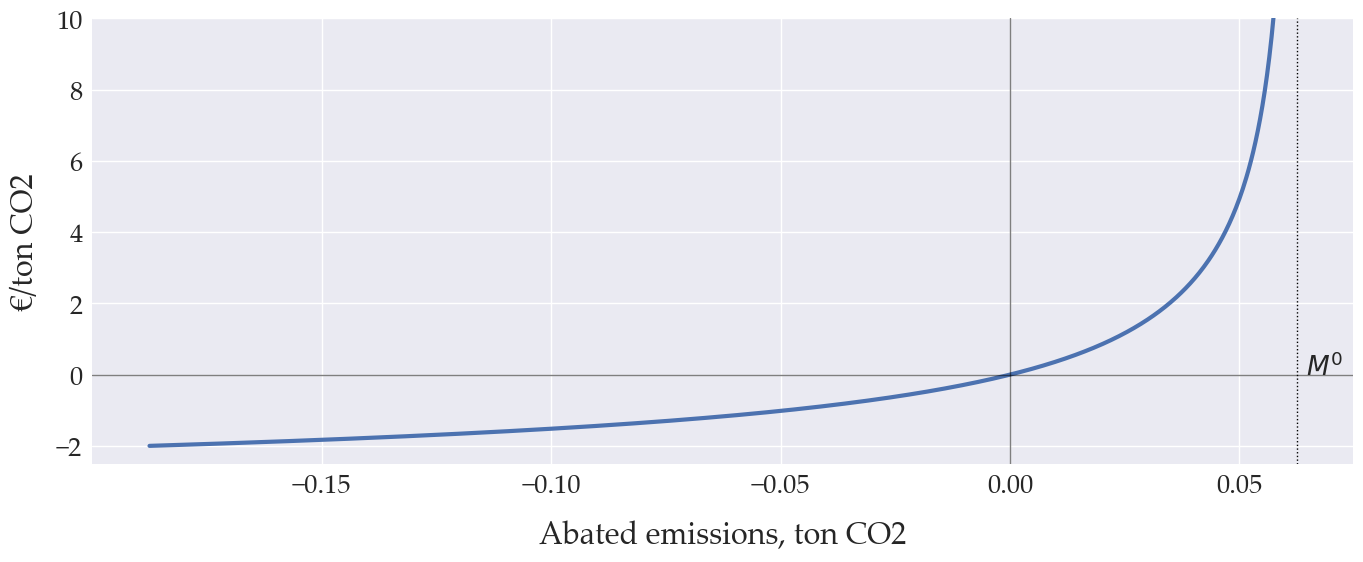

In [9]:
one_graph()
fig, ax = plt.subplots(1,1,figsize = (14,6)); # size of plot
seaborn.lineplot(data = MAC, ax = ax, linewidth=3); # main plot
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5); # x-axis
ax.axvline(x=0, linewidth = 1, color = 'k', alpha = 0.5); # y-axis
ax.axvline(x=M0, linewidth= 1, color = 'k', alpha=1, linestyle = ':') # Maximum abatement
ax.set_ylim((-2.5, 10))
plt.annotate(f'$M^0$', xy = (M0+0.002, 0));
ax.set_xlabel('Abated emissions, ton CO2', labelpad = 15);
ax.set_ylabel('€/ton CO2', labelpad = 10);
fig.tight_layout(); # automatic adjustment of layout
fig.savefig(os.path.join(d['figs'], "MAC_1_MAC.pdf"),edgecolor='k') # save as pdf

### 1.3. Solve for optimum

*Define new consumption function with climate damages:*

In [10]:
def CwithDamages(E, α, γ, pe, γd):
    return γ * np.power(E, α) - pe * E - γd * np.power(ϕ*E, 2)/2

We can use the ```scipy.optimize``` to solve the equation $\alpha \gamma E^{\alpha-1}-p_e-\phi\gamma_d\phi E = 0$; this identifies the optimal $E^*$:

In [11]:
Eopt = optimize.fsolve(lambda E: α*γ*E**(α-1)-pe-ϕ*γd*ϕ*E, .5) # optimal E
Copt = CwithDamages(Eopt, α, γ, pe, γd) # optimal C
Mopt = ϕ*Eopt # optimal M
τ = MACfunction(Eopt, α, γ, pe, ϕ, M0) # Marginal abatement cost in optimum

### 1.4. Plot marginal costs and marginal damages

*Define damages as a function of abated emissions so we can plot it next to MAC*

In [12]:
def marginalDamages(E, ϕ, M0, γd):
    return pd.Series(γd*ϕ*E, 
                     index = pd.Index(Afunction(E, ϕ, M0), name = '$A$'),
                     name = '$\partial D/\partial M$'
                    )

Set up solution in a dataframe with $MAC$ and marginal damages in the columns:

In [13]:
dfOpt = pd.concat([MAC, marginalDamages(Egrid, ϕ, M0, γd)], axis = 1)

*Plot:*

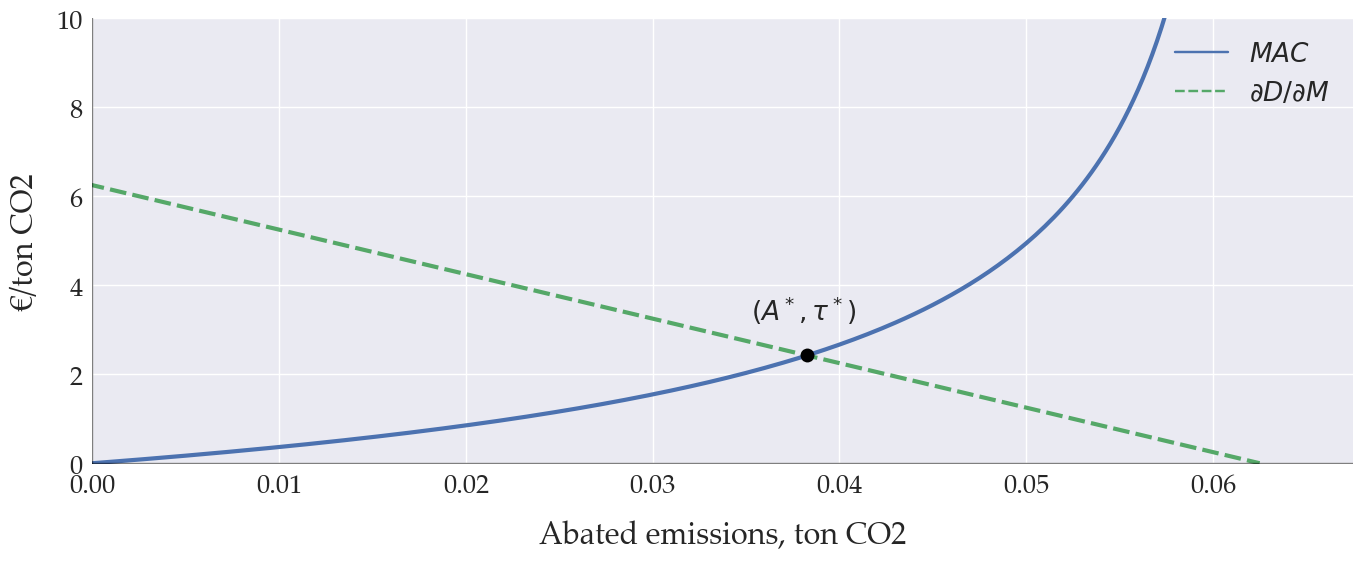

In [14]:
one_graph()
fig, ax = plt.subplots(1,1,figsize = (14,6)); # size of plot
seaborn.lineplot(data = dfOpt, ax = ax, linewidth=3); # main plot
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5); # x-axis
ax.axvline(x=0, linewidth = 1, color = 'k', alpha = 0.5); # y-axis
ax.set_ylim((-0.01, 10));
ax.set_xlim((-0.00001, M0+0.005));
ax.set_xlabel('Abated emissions, ton CO2', labelpad = 15);
ax.set_ylabel('€/ton CO2', labelpad = 10);
ax.plot(τ.index, τ.values, 'o', markersize = 10, color = 'k') # add marker to the optimum
plt.annotate(f'$(A^*, \\tau^*)$', xy = (τ.index[0]-0.003, τ.values[0]+.8));
fig.tight_layout(); # automatic adjustment of layout
fig.savefig(os.path.join(d['figs'], "MAC_1_Opt.pdf"),edgecolor='k') # save as pdf

## 2. Marginal Abatement Costs With Technical Abatement 

In the second exercise, we consider the model from section 2 in *A Simple Model of Abatement Costs*. We generally rely on the same assumptions as in exercise 1 (on parameter values and functional forms). The extension in section 2 is abatement technologies. These are characterized by three parameters: Emissions reduction potential ($\theta_i$), average costs per unit of emission reduction $(c_i)$, and the standard deviation in costs $(\sigma_i)$. Specifically, we assume that there are three technologies ($A, B, C$) where:

In [15]:
Tech = pd.Index(['A','B', 'C'], name = 'i')
θi = pd.Series([0.1, 0.2, 0.3], index = Tech, name  = 'θ')
ci = pd.Series([0.5, 2, 5], index = Tech, name = 'c')
σi = pd.Series([.1, .2, .05], index = Tech, name = 'σ')

When illustrating things, we use a grid of marginal damages:

In [16]:
mdGrid = np.linspace(0, 10, 1001)

As in the lecture note, we assume that costs are log-normally distributed.

### 2.1. Illustrate Technological Abatement

*1. For technology ```A```*, illustrate $a^*$ as a function of marginal damages.

Use the function provided in the lecture note for the optimal $a^*_i$:

In [17]:
def opt_i(md, ci, σi, i):
    return scipy.stats.norm.cdf( 
        (np.log(md/ci[i])+σi[i]**2/2)/σi[i]
    )

Solve for technology 'A' and plot:

C:\Users\sxj477\AppData\Local\Temp\ipykernel_14728\2707868152.py:3: RuntimeWarning: divide by zero encountered in log
  (np.log(md/ci[i])+σi[i]**2/2)/σi[i]


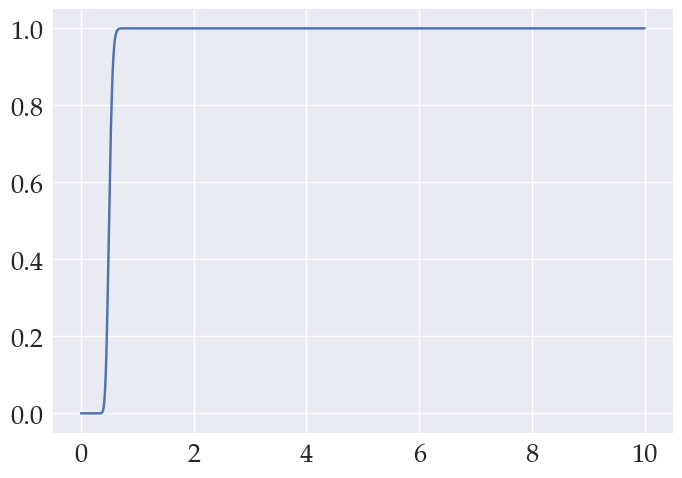

In [18]:
aopt_A = opt_i(mdGrid, ci, σi, 'A')
pd.Series(aopt_A, index = mdGrid).plot();

*2. Show the cumulative abated emissions defined by $\sum_i a_i\theta_i$ as a function of marginal damages and explain how this looks.*

This is a simply loop implementation:

In [19]:
cumulativeSol = np.zeros(mdGrid.shape)
for tech in Tech:
    aopt = opt_i(mdGrid, ci, σi, tech) * θi[tech]
    cumulativeSol += aopt

C:\Users\sxj477\AppData\Local\Temp\ipykernel_14728\2707868152.py:3: RuntimeWarning: divide by zero encountered in log
  (np.log(md/ci[i])+σi[i]**2/2)/σi[i]


Simply plotting:

In [20]:
aopt_sum = pd.Series(cumulativeSol, index = pd.Index(mdGrid, name = '€/ton CO2'))
# aopt_sum.plot()

Fancy plot:

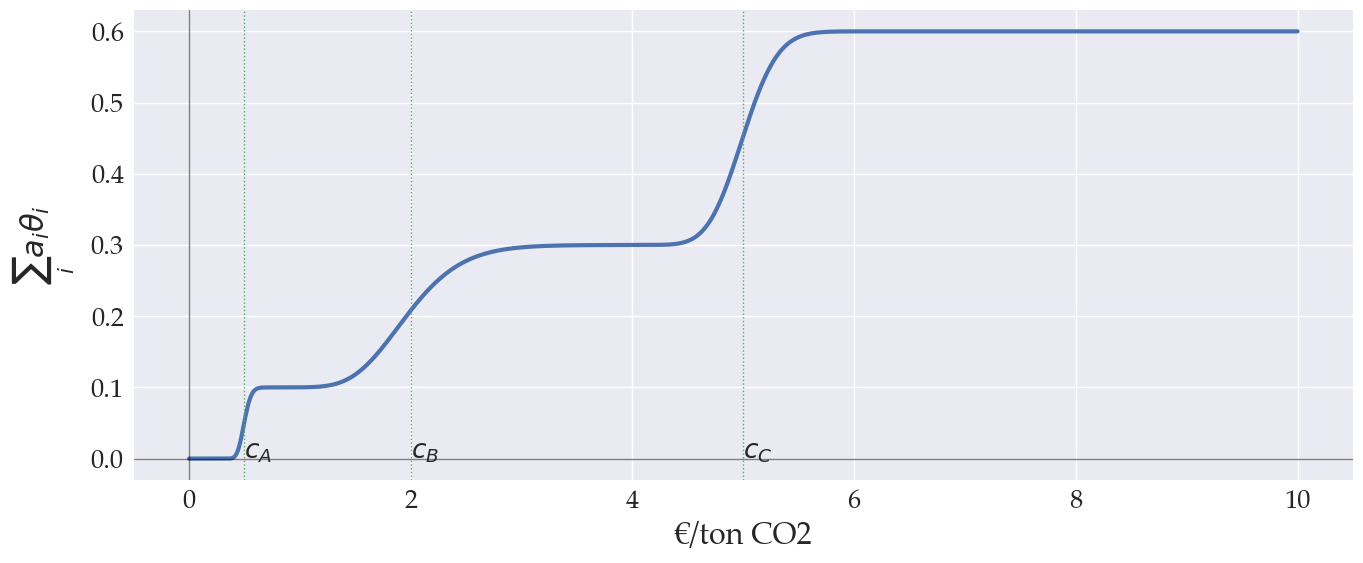

In [21]:
one_graph()
fig, ax = plt.subplots(1,1,figsize = (14,6)); # size of plot
seaborn.lineplot(data = aopt_sum, ax = ax, linewidth=3); # main plot
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5); # x-axis
ax.axvline(x=0, linewidth = 1, color = 'k', alpha = 0.5); # y-axis
ax.set_ylabel('$\sum_i a_i\\theta_i$', labelpad = 10);
for tech in Tech:
    ax.axvline(x=ci[tech], linewidth=1, color = colors[1], linestyle = ':')
    plt.annotate(f'$c_{tech}$', xy = (ci[tech], 0))
fig.tight_layout(); # automatic adjustment of layout
fig.savefig(os.path.join(d['figs'], "MAC_2_TechAbate.pdf"),edgecolor='k') # save as pdf

### 2.2. Marginal abatement costs and fossil energy consumption with/without technical abatement

To illustrate the effect of technical abatement, we start by taking the value of marginal damages $D'(M)$ as given. Equation (7) in the lecture note defines the optimal level of fossil energy consumption in this model. 
1. For various levels of $D'(M)$, compute the right-hand side of (7). 
2. Plot this and explain what this means for the cost of consuming fossil energy. 

We already have $\sum_i \theta_i a_i$ defined over a grid of $D'(M)$. The other important thing we need to define is the abatement cost function. Specifically, we need to evaluate $\sum_i \theta_i f_i(a_i)$ on a grid of $D'(M)$.

Define $f_i(a_i)$ in optimum:

In [22]:
def opt_fi(md, ci, σi, i):
    return scipy.stats.norm.cdf( 
        (np.log(md/ci[i])-σi[i]**2/2)/σi[i]
    ) * ci[i]

Define the cumulative sum of this by looping as in the previous section:

In [23]:
cumulativeSol_f = np.zeros(mdGrid.shape)
for tech in Tech:
    fopt = opt_fi(mdGrid, ci, σi, tech) * θi[tech]
    cumulativeSol_f += fopt

C:\Users\sxj477\AppData\Local\Temp\ipykernel_14728\1607022001.py:3: RuntimeWarning: divide by zero encountered in log
  (np.log(md/ci[i])-σi[i]**2/2)/σi[i]


Set up data with/without abatement:

In [24]:
margDamages = pd.DataFrame({'Without abatement': mdGrid,
                            'With abatement': mdGrid*(1-cumulativeSol)+cumulativeSol_f
                           }, 
                           index = mdGrid)

*Simple plot:*

In [25]:
# margDamages.plot()

*Fancy plot:*

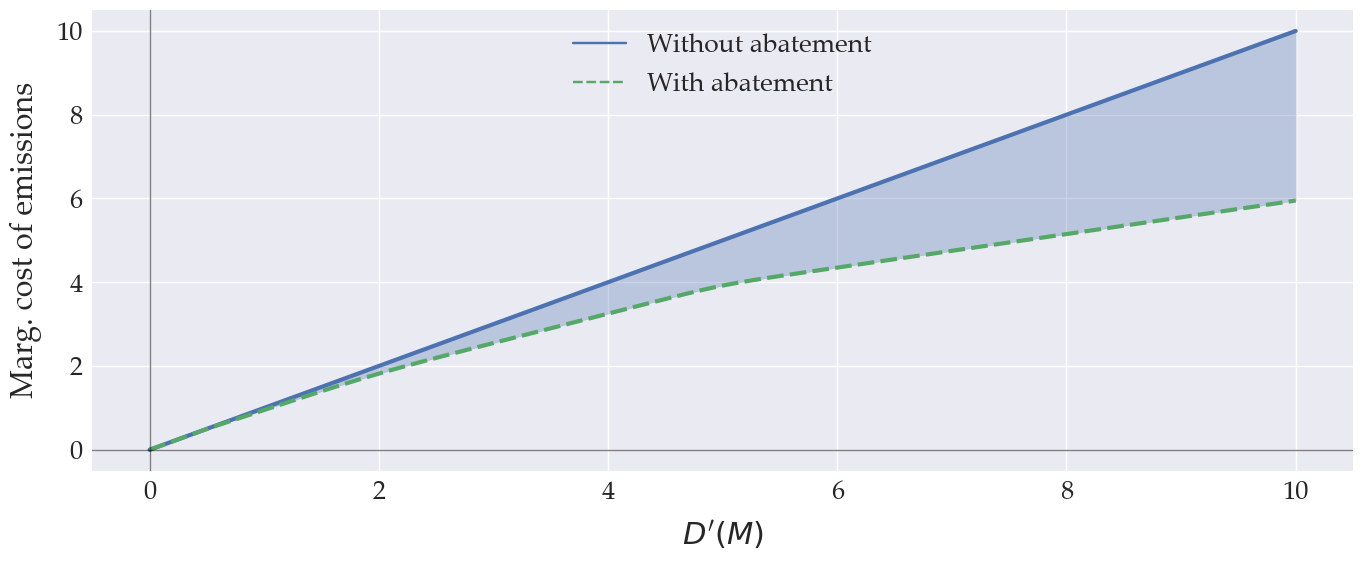

In [26]:
one_graph()
fig, ax = plt.subplots(1,1,figsize = (14,6)); # size of plot
seaborn.lineplot(data = margDamages, ax = ax, linewidth=3); # main plot
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5); # x-axis
ax.axvline(x=0, linewidth = 1, color = 'k', alpha = 0.5); # y-axis
ax.set_xlabel("$D'(M)$", labelpad = 10);
ax.set_ylabel(f'Marg. cost of emissions',labelpad=10);
ax.fill_between(margDamages.index, margDamages['With abatement'], margDamages['Without abatement'], alpha = .3, color = colors[0])
fig.tight_layout()
fig.savefig(os.path.join(d['figs'], "MAC_2_TechEffect.pdf"),edgecolor='k') # save as pdf

### 2.3. Identify new optimum

The optimal level of $E^*$ solves the system:
$$\begin{align}
    \dfrac{F'(E)- p_e}{\phi} = D'(M)\left(1-\sum_i\theta_ia_i\right)+\sum_i\theta_if_i(a_i),
\end{align}$$
where 
$$\begin{align}
    M &= \phi E\left(1-\sum_i \theta_ia_i\right), \\
    a_i &= \Phi\left(\dfrac{\ln(D'(M)/c_i)+\sigma_i^2/2}{\sigma_i}\right) \\ 
    f_i(a_i) &= \Phi\left(\dfrac{\ln(D'(M)/c_i)-\sigma_i^2/2}{\sigma_i}\right)
\end{align}$$

### 2.4. Illustrate new marginal abatement cost curve

The simplest way to do this is as follows:
1. Grid of $D'(M)$. (from earlier)
2. Define optimal $a_i^*$ and $f_i(a_i)$. (from earlier)
3. Define $X=(F'(E)-p_e)/\phi$ from first order condition. (from earlier)
4. Back out $E$ from first order condition, that is:
$$\begin{align}
    E = \left(\dfrac{\alpha \gamma}{\phi X+p_e}\right)^{\frac{1}{1-\alpha}}
\end{align}$$
* Compute $M$ from the definition: 
$$\begin{align}
    M = \phi E(1-\sum_i a_i\theta_i).
\end{align}$$
* Use that $MAC = D'(M)$ and plot MAC on the grid of abatement measured as $M^0-M$.

In [27]:
mdGrid
X_mdGrid = margDamages['With abatement'].values
E_mdGrid = np.power(α*γ/(ϕ*X_mdGrid+pe), 1/(1-α))
M_mdGrid = ϕ*E_mdGrid*(1-cumulativeSol)
MAC_mdGrid = X_mdGrid/(1-cumulativeSol)-cumulativeSol_f/(1-cumulativeSol) # confirm that this equals D'(M)
MAC_withTech = pd.Series(mdGrid, index = M0-M_mdGrid)

Plot next to the one without technical abatement:

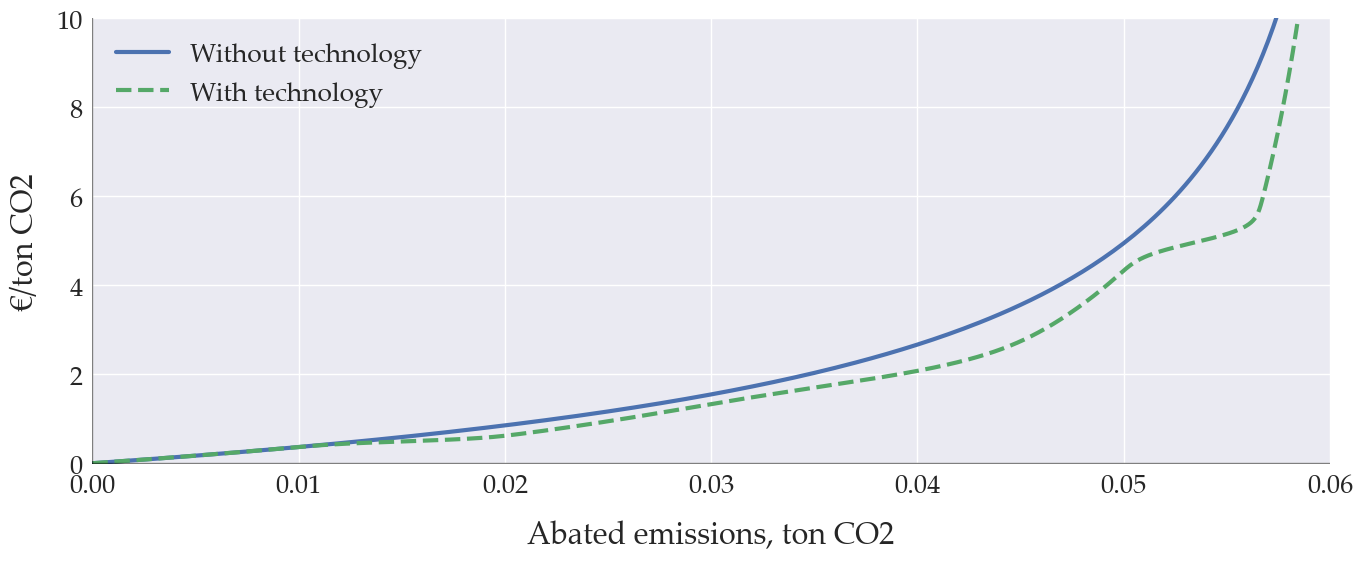

In [52]:
one_graph()
fig, ax = plt.subplots(1,1,figsize = (14,6)); # size of plot
seaborn.lineplot(data = MAC, ax = ax, linewidth=3, label = 'Without technology');
seaborn.lineplot(data = MAC_withTech, ax = ax, linewidth=3, color = colors[1], linestyle = 'dashed', label = 'With technology'); 
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5); # x-axis
ax.axvline(x=0, linewidth = 1, color = 'k', alpha = 0.5); # y-axis
ax.set_ylim((-0.01, 10));
ax.set_xlim((-0.00001, 0.06));
ax.set_xlabel('Abated emissions, ton CO2', labelpad = 15);
ax.set_ylabel('€/ton CO2', labelpad = 10);
fig.tight_layout(); # automatic adjustment of layout
fig.savefig(os.path.join(d['figs'], "MAC_2_Opt.pdf"),edgecolor='k') # save as pdf